# Decision Tree Classifiers

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

# You need to install the pip Python package
%pip install graphviz


# You also need to download graphviz from https://graphviz.org/download/
# and you must then add directory path to dot.exe to system path

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Purity Measures
We need to find a quantity that is minimised when the two classes are equally separated

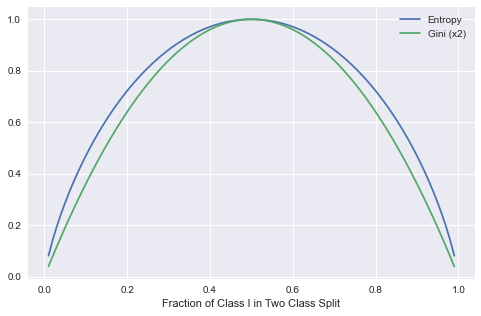

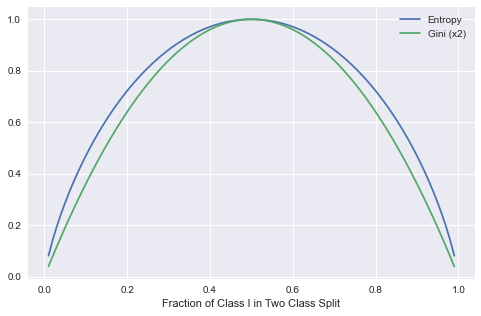

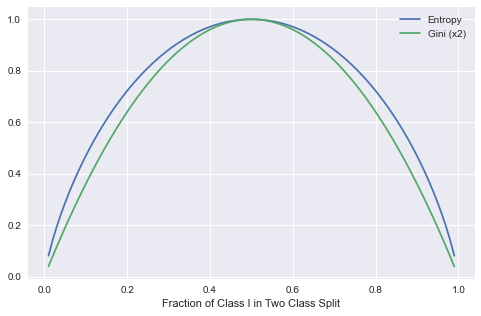

In [13]:
r=np.linspace(0.01,0.99,100)
e=-r*np.log2(r)-(1-r)*np.log2(1-r)
g=2.0*((1-r*r)-(1-r)**2)

plt.figure(figsize=(8,5))
plt.plot(r,e,label="Entropy")
plt.plot(r,g,label="Gini (x2)")
plt.xlabel('Fraction of Class I in Two Class Split')
plt.legend();

## Visualisation

In [14]:
m=250

In [15]:
np.random.seed(10)

In [16]:
X = np.random.rand(m,2)

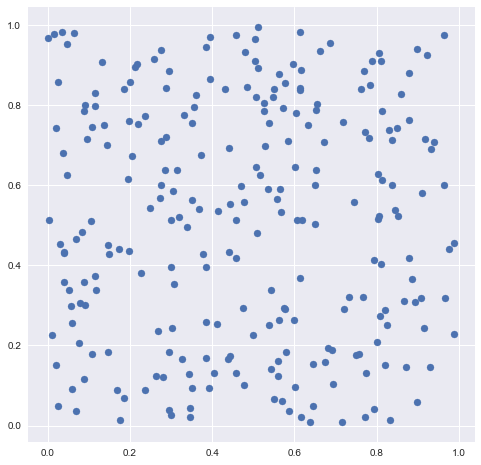

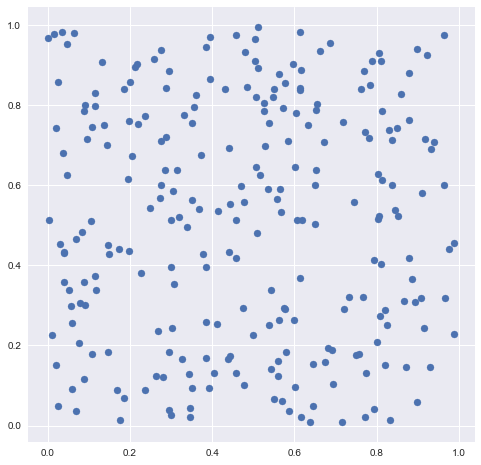

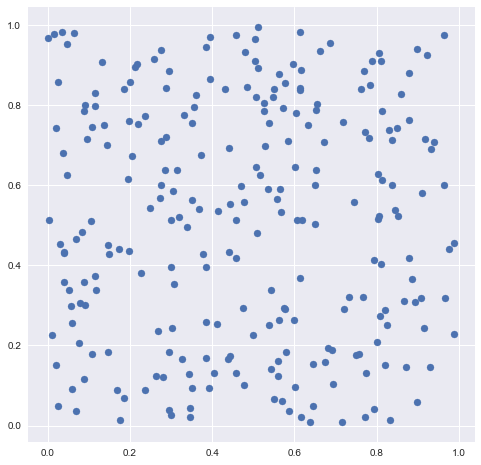

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1]);

In [18]:
y = []

for i in range(0,int(m)):
    
    xx = X[i,0]
    yy = X[i,1]
    c = 0
    
    if xx < 0.5 and yy < 0.3:
        c = 1
    
    if xx > 0.5 and yy > 0.5 and yy < 0.8:
        c = 1

    if xx > 0.5 and xx < 0.7 and yy > 0.8:
        c = 1
        
    y.append(c)

Text(0, 0.5, 'Y')

Text(0, 0.5, 'Y')

Text(0, 0.5, 'Y')

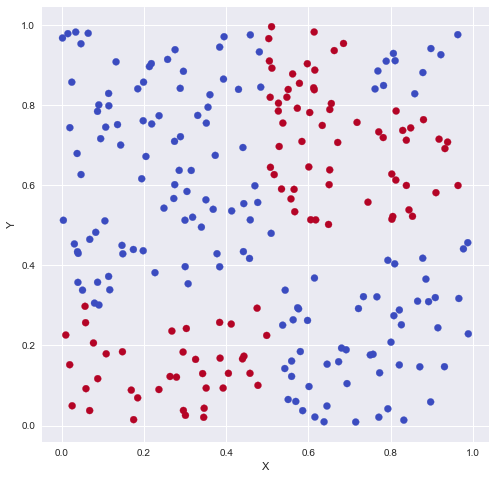

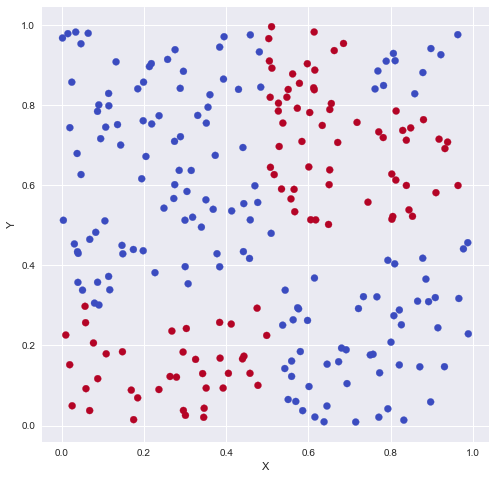

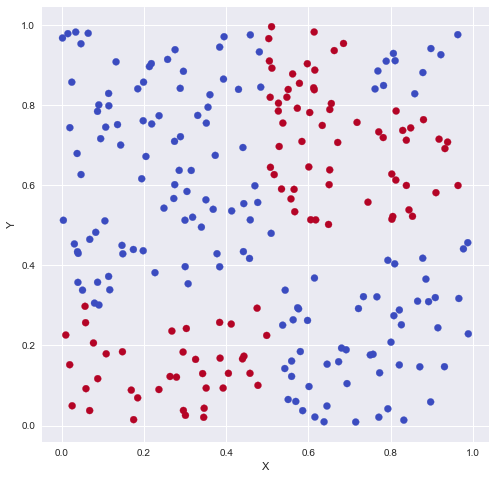

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.coolwarm)
plt.xlabel("X")
plt.ylabel("Y")

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source

In [21]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X, y)

In [22]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names=['X','Y']))
SVG(graph.pipe(format='svg'))

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

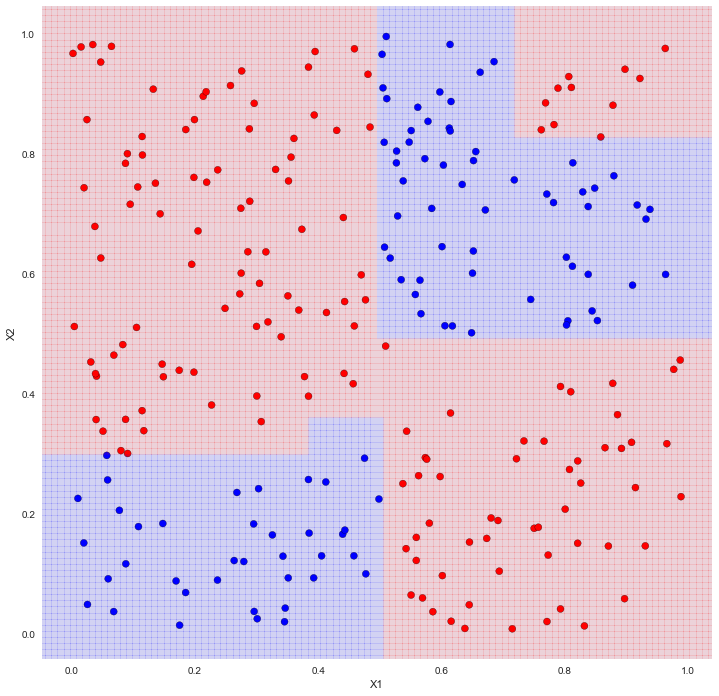

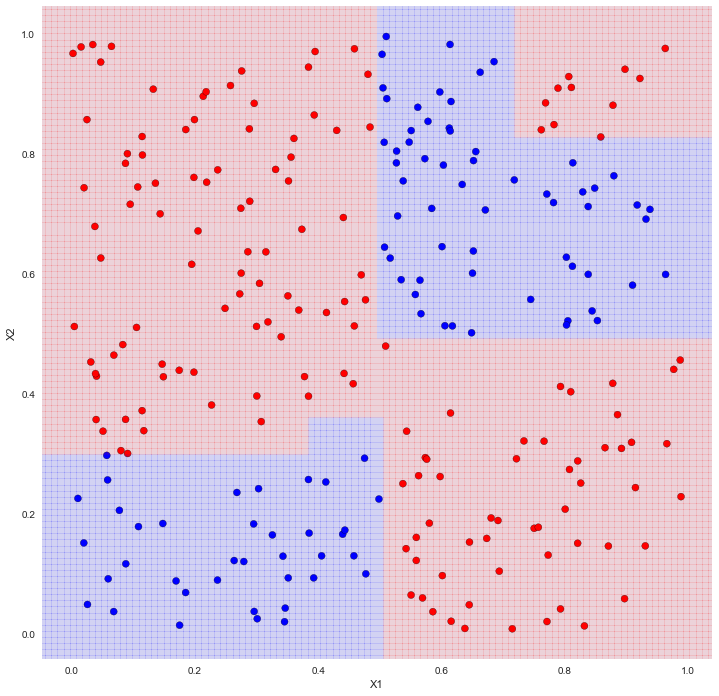

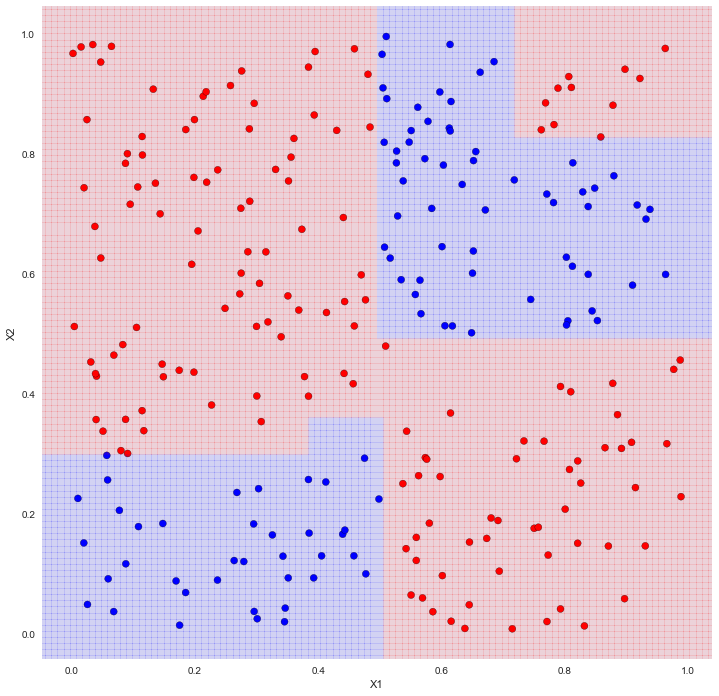

In [23]:
import HelpfulFunctions as hp
df = pd.DataFrame(X)
df.columns = ['X1','X2']
plt.figure(figsize=(12,12));
hp.featureSpacePlot('X1','X2',df,y,clf,plt);

## Using a Decision Tree Classifier on Iris Dataset

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
    
iris = load_iris()
X = pd.DataFrame(iris.data)
y = iris.target
X.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']
X.head()

In [ ]:
X.shape

### Using Three Features to Predict Virginica

In [ ]:
X_3 = X[['petalLength','petalWidth','sepalLength']]

In [ ]:
# I only want a binary classification to start with
y_3 = (np.array(y)).astype(np.int)

In [ ]:
y_3

In [ ]:
clf = DecisionTreeClassifier(random_state=235, max_depth=7)
clf = clf.fit(X_3, y_3)

In [ ]:
y_pred  = clf.predict(X_3)

The decision tree will perfectly fit the training data.

In [ ]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names = X_3.columns))
SVG(graph.pipe(format='svg'))

In [ ]:
confusion_matrix(y_3, y_pred)

In [ ]:
hp.plot_cm(clf, X_3, y_3, display_labels=['setosa','versicolor','virginica'])

We can fit the data exactly.

### Using Two Features to Predict Virginica

In [ ]:
X_2 = X[['sepalLength','sepalWidth']]

In [ ]:
# I only want a binary classification to start with
y_2 = (np.array(y)==2).astype(np.int)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_2, y_2)

In [ ]:
y_pred  = clf.predict(X_2)

In [ ]:
confusion_matrix(y_2, y_pred)

In [ ]:
print(classification_report(y_2,y_pred))

In [ ]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names = X_2.columns))
SVG(graph.pipe(format='svg'))

In [ ]:
X_2['y_2'] = y_2
X_2 = X_2.sort_values(['sepalLength', 'sepalWidth'])

In [ ]:
X_2[80:100]

There are duplicate rows with different labels at [6.0, 2.2].

### Using Four Features to Predict Virginica

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=234)
clf = clf.fit(X, y_2)

In [ ]:
y_pred  = clf.predict(X)

In [ ]:
cm = confusion_matrix(y_2, y_pred)

In [ ]:
print(cm)

The Decision Tree has the ability to do a perfect fit.

In [ ]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names = X.columns))
SVG(graph.pipe(format='svg'))

We can fit the training data exactly.

## Multiclass Classification Decision Boundary

In [ ]:
# Let us examine all of the Feature Space Decision Boundaries

import HelpfulFunctions as hp

plt.figure(figsize=(24,14))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    
    featureX = X.columns[pair[0]]
    featureY = X.columns[pair[1]]
    
    X_2 = X[[featureX, featureY]]

    clf = DecisionTreeClassifier()
    clf.fit(X_2, y)
    
    plt.subplot(2, 3, pairidx + 1)
    
    hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)


## Prediction Quality with Two Features

In [ ]:
featureX = 'sepalLength'
featureY = 'sepalWidth'

X_2 = X[[featureX,featureY]]
y = iris['target']

clf = DecisionTreeClassifier()
clf.fit(X_2, y)
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)

In [ ]:
y_pred = clf.predict(X_2)

In [ ]:
confusion_matrix(y, y_pred)

In [ ]:
hp.plot_cm(clf, X_2, y, display_labels=['setosa','versicolor','virginica'])